In [5]:
import open3d as o3d
import numpy as np
import plotly.graph_objects as go
from scipy.spatial.transform import Rotation as R
import copy

print(o3d.__version__)

poses = np.load('poses_ghall.npy')

0.18.0


# Open3d 0.18.0 documentation 
https://www.open3d.org/docs/release/index.html

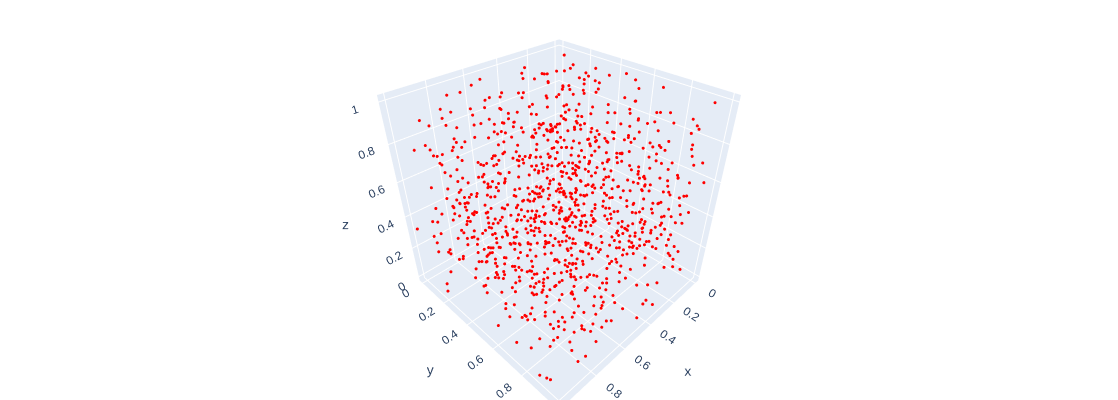

In [6]:
pcd = o3d.geometry.PointCloud()
points = np.random.rand(1000,3)
pcd.points = o3d.utility.Vector3dVector(points)

o3d.visualization.draw_plotly([pcd])

In [7]:
o3d.visualization.draw_geometries([pcd])

libGL: Can't open configuration file /etc/drirc: No such file or directory.
libGL: Can't open configuration file /home/daniel-choate/.drirc: No such file or directory.
using driver i915 for 77
libGL: Can't open configuration file /etc/drirc: No such file or directory.
libGL: Can't open configuration file /home/daniel-choate/.drirc: No such file or directory.
using driver i915 for 77
pci id for fd 77: 8086:a7a0, driver iris
MESA-LOADER: dlopen(/usr/lib/x86_64-linux-gnu/dri/iris_dri.so)
libGL: Can't open configuration file /etc/drirc: No such file or directory.
libGL: Can't open configuration file /home/daniel-choate/.drirc: No such file or directory.
libGL: Can't open configuration file /etc/drirc: No such file or directory.
libGL: Can't open configuration file /home/daniel-choate/.drirc: No such file or directory.
libGL: Can't open configuration file /etc/drirc: No such file or directory.
libGL: Can't open configuration file /home/daniel-choate/.drirc: No such file or directory.
Using 

In [4]:
# Plotting with a background color 

vis = o3d.visualization.Visualizer()
vis.create_window()
vis.add_geometry(pcd)

render_option = vis.get_render_option()

# LIGHT BLUE
render_option.background_color = [0.678, 0.847, 0.902]

render_option.point_size = 1

vis.run()

vis.destroy_window()

libGL: Can't open configuration file /etc/drirc: No such file or directory.
libGL: Can't open configuration file /home/daniel-choate/.drirc: No such file or directory.
using driver i915 for 77
libGL: Can't open configuration file /etc/drirc: No such file or directory.
libGL: Can't open configuration file /home/daniel-choate/.drirc: No such file or directory.
using driver i915 for 77
pci id for fd 77: 8086:a7a0, driver iris
MESA-LOADER: dlopen(/usr/lib/x86_64-linux-gnu/dri/iris_dri.so)
libGL: Can't open configuration file /etc/drirc: No such file or directory.
libGL: Can't open configuration file /home/daniel-choate/.drirc: No such file or directory.
libGL: Can't open configuration file /etc/drirc: No such file or directory.
libGL: Can't open configuration file /home/daniel-choate/.drirc: No such file or directory.
libGL: Can't open configuration file /etc/drirc: No such file or directory.
libGL: Can't open configuration file /home/daniel-choate/.drirc: No such file or directory.
Using 

In [ ]:
# # Convert .txt files to .xyz files to be match open3d format

# # Replace with your input and output file paths
# input_file = ptCloud1_fn
# output_file1 = "/home/daniel-choate/ASAR/s1/ErrorVectorFields/Cloud1_ExpD.xyz"

# # Read data from .txt file
# with open(input_file, 'r') as f:
#     lines = f.readlines()

# # Extract XYZ coordinates and write to .xyz file
# with open(output_file1, 'w') as f:
#     for line in lines:
#         if line.strip():  # Check if line is not empty
#             # Assuming each line contains XYZ coordinates separated by spaces or commas
#             parts = line.strip().split()
#             if len(parts) >= 3:
#                 x, y, z = parts[:3]  # Extract XYZ coordinates
#                 f.write(f"{x} {y} {z}\n")  # Write XYZ coordinates in .xyz format

# # Replace with your input and output file paths
# input_file = ptCloud10_fn
# output_file10 = "/home/daniel-choate/ASAR/s1/ErrorVectorFields/Cloud10_ExpD.xyz"

# # Read data from .txt file
# with open(input_file, 'r') as f:
#     lines = f.readlines()

# # Extract XYZ coordinates and write to .xyz file
# with open(output_file10, 'w') as f:
#     for line in lines:
#         if line.strip():  # Check if line is not empty
#             # Assuming each line contains XYZ coordinates separated by spaces or commas
#             parts = line.strip().split()
#             if len(parts) >= 3:
#                 x, y, z = parts[:3]  # Extract XYZ coordinates
#                 f.write(f"{x} {y} {z}\n")  # Write XYZ coordinates in .xyz format

In [ ]:
def plot_red_line():
    # Create Open3D visualizer object
    vis = o3d.visualization.Visualizer()
    vis.create_window(window_name='Red Line Plot', width=800, height=600)

    # Define the start and end points of the line
    start_point = np.array([0, 0, 0])
    end_point = np.array([1, 1, 1])
    
    # Create LineSet object
    line_set = o3d.geometry.LineSet()
    
    # Define the points (start and end of the line)
    points = np.array([start_point, end_point])
    line_set.points = o3d.utility.Vector3dVector(points)
    
    # Define the line (connecting start and end points)
    lines = np.array([[0, 1]])
    line_set.lines = o3d.utility.Vector2iVector(lines)
    
    # Define the color (red) for the line
    # Ensure color is applied to both ends of the line
    colors = [[1, 0, 0]]# for i in range(len(line_set))]
    line_set.colors = o3d.utility.Vector3dVector(colors)
    
    # Add LineSet to the visualizer
    vis.add_geometry(line_set)
    
    # CAMERA VISIBILITY ANGLE
    ctr = vis.get_view_control()
    ctr.set_lookat([0.5, 0.5, 0.5])
    ctr.set_front([1, 1, 1])
    ctr.set_up([0, 0, 1])
    ctr.set_zoom(0.8)
    
    # Update and render the visualizer
    vis.update_geometry(line_set)
    vis.poll_events()
    vis.update_renderer()
    
    # Run the visualizer
    vis.run()
    
    # Destroy the visualizer window
    vis.destroy_window()

# Call the function to plot the red line
plot_red_line()


In [ ]:
print("Let\'s draw a cubic using o3d.geometry.LineSet")
points = [[0, 0, 0], [1, 0, 0], [0, 1, 0], [1, 1, 0], [0, 0, 1], [1, 0, 1],
          [0, 1, 1], [1, 1, 1]]
lines = [[0, 1], [0, 2], [1, 3], [2, 3], [4, 5], [4, 6], [5, 7], [6, 7],
         [0, 4], [1, 5], [2, 6], [3, 7]]
colors = [[1, 0, 0] for i in range(len(lines))]
print(colors)
line_set = o3d.geometry.LineSet()
line_set.points = o3d.utility.Vector3dVector(points)
line_set.lines = o3d.utility.Vector2iVector(lines)
line_set.colors = o3d.utility.Vector3dVector(colors)
o3d.visualization.draw_geometries([line_set])

In [ ]:
# NOTE: FOR THIS TO RUN, NEED POSES DATA

# Create Open3D visualizer object
vis = o3d.visualization.Visualizer()
vis.create_window(window_name='3D Plot with Axes and Vectors', width=1000, height=1000)

# Add coordinate axes
axes = o3d.geometry.TriangleMesh.create_coordinate_frame(size=1.0)
vis.add_geometry(axes)

# Colors for the axes: Red, Green, Blue
colors = [
    [1, 0, 0],  # Red for X-axis
    [0, 1, 0],  # Green for Y-axis
    [0, 0, 1]   # Blue for Z-axis
]

# Loop over each pose
# for pose in poses:
for i in range(3):
    # print(i)
    # print(poses[i])
    
    # Extract position and rotation matrix from the 4x4 matrix
    position = poses[i][:3, 3]  # Position vector (first 3 elements of the last column)
    rotation_matrix = poses[i][:3, :3]  # Top-left 3x3 submatrix
    # print("Position:\n", position)
    # print("Rotation Matrix:\n", rotation_matrix)
    
    # Calculate heading vectors (x, y, z axes)
    headings = np.array([
        rotation_matrix @ np.array([1, 0, 0]),  # X-axis
        rotation_matrix @ np.array([0, 1, 0]),  # Y-axis
        rotation_matrix @ np.array([0, 0, 1])   # Z-axis
    ])
    # print("Headings:\n", headings)
    
    # Create and add LineSets for each heading vector with respective color
    for heading, color in zip(headings, colors):
        # Ensure that position and heading are NumPy arrays
        position_np = np.array(position)
        end_point = position_np + heading * 0.5
        
        # Create LineSet
        arrow = o3d.geometry.LineSet()
        points = np.array([position_np, end_point])
        arrow.points = o3d.utility.Vector3dVector(points)
        arrow.lines = o3d.utility.Vector2iVector([[0, 1]])
        
        # Set color
        arrow.colors = o3d.utility.Vector3dVector([color])  # Set color for the single line segment
        
        # Add the arrow to the visualizer
        vis.add_geometry(arrow)

# Run the visualizer
vis.run()
vis.destroy_window()

In [ ]:
# Basic sanity check to insure open3d is working

import open3d as o3d
import numpy as np

# Minimal example
vis = o3d.visualization.Visualizer()
vis.create_window(window_name='Test Window', width=800, height=600)

# Create a simple LineSet
points = np.array([[0, 0, 0], [1, 1, 1]])
lines = np.array([[0, 1]])

line_set = o3d.geometry.LineSet()
line_set.points = o3d.utility.Vector3dVector(points)
line_set.lines = o3d.utility.Vector2iVector(lines)
line_set.colors = o3d.utility.Vector3dVector([[1, 0, 0]])#, [1, 0, 0]])

vis.add_geometry(line_set)
vis.run()
vis.destroy_window()


In [ ]:
import open3d as o3d
import numpy as np
import plotly.graph_objects as go
from scipy.spatial.transform import Rotation as R


# Plotting POSES AND 3D CLOUD 
# Data generated by COLMAP 

red = [1,0,0]
green = [0,1,0]
blue = [0,0,1]

# Create Open3D visualizer object
vis = o3d.visualization.Visualizer()
vis.create_window(window_name='Pose Axes Experimenting', width=1000, height=1000)

# Add coordinate axes
rot_mat = np.array([
    [0.23980005,  0.21485282,  0.94674928],
    [-0.09987617,  0.97548879, -0.19607747],
    [-0.96567111, -0.0475383,   0.25538094]
])
trans = np.array([1, 1, 1]).reshape(3,1)
# rot_mat = rot_mat.reshape(3,3)
print(rot_mat)
axes = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.5, origin=np.array([0.,0.,0]))
axes1= o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.5, origin=np.array([1.,1.,1]))
cone1 = o3d.geometry.TriangleMesh.create_arrow(
    cylinder_radius=0.02, cone_radius=0.03, cylinder_height=.4, cone_height=0.1,
    resolution=20, cylinder_split=4, cone_split=1) 


# cone1 = cone1 + trans
#, origin = np.array([1.,1.,1]))

# cone1.origin = ([1.,1.,1])
# cone1.translate([1.,1.,1])

# Rotate 90 degrees about y to get x axis from z axis 
# initialize 3x3 rotation matrix
translate = ([0.,0.,0])
n = np.deg2rad(90)
euler_angles = [0., n, 0.] #rotation about xaxis, yaxis, zaxis
rotm = R.from_euler('xyz', euler_angles).as_matrix()
print("\n rotation matrix (3x3) \n", rotm, "\n")
cone1.rotate(rotm, center=translate)
cone1.paint_uniform_color(red)
# vis.add_geometry(cone1)


# Rotate 90 degrees about z to get y axis from x axis
cone2 = o3d.geometry.TriangleMesh.create_arrow(
    cylinder_radius=0.02, cone_radius=0.03, cylinder_height=.4, cone_height=0.1,
    resolution=20, cylinder_split=4, cone_split=1)
euler_angles = [n*3, 0., 0.] #rotation about xaxis, yaxis, zaxis
rotm = R.from_euler('xyz', euler_angles).as_matrix()
print("\n rotation matrix (3x3) \n", rotm, "\n")
cone2.rotate(np.eye(3), center=translate)
cone2.rotate(rotm, center=translate)
cone2.paint_uniform_color(green)

cone0 = o3d.geometry.TriangleMesh.create_arrow(
    cylinder_radius=0.02, cone_radius=0.03, cylinder_height=.4, cone_height=0.1,
    resolution=20, cylinder_split=4, cone_split=1) 

cone0.translate(translate)
cone0.paint_uniform_color(blue)

vis.add_geometry(axes)
# vis.add_geometry(axes1)
vis.add_geometry(cone0)
vis.add_geometry(cone1)
vis.add_geometry(cone2)







# Run the visualizer
vis.run()
vis.destroy_window()

In [ ]:
def create_coord_frame(trans, dir,size):
    """ 
    creating a coordinate frame for plotting in open3d
    Inputs: translation vector (origin)
    Direction: rotation matrix
    Outputs: 3 arrows representing x,y,z
    """
    red = [1,0,0]
    green = [0,1,0]
    blue = [0,0,1]
    n = np.deg2rad(90)

    origin = [0.,0.,0]

    # Create initial vector 
    # Note, the arrow function begins at the z-axis 
    zcoord = o3d.geometry.TriangleMesh.create_arrow(
        cylinder_radius=0.02*size, cone_radius=0.03*size, cylinder_height=.4*size, cone_height=0.05*size,
        resolution=20, cylinder_split=4, cone_split=1) 
    
    zcoord.translate(trans)
    zcoord.rotate(dir, center=trans)
    zcoord.paint_uniform_color(blue)

    # Create x-axis
    # Rotate 90 degrees about y to get x-axis from z-axis
    xcoord = o3d.geometry.TriangleMesh.create_arrow(
        cylinder_radius=0.02, cone_radius=0.03, cylinder_height=.4, cone_height=0.05,
        resolution=20, cylinder_split=4, cone_split=1) 
    euler_angles = [0., n, 0.] #rotation about xaxis, yaxis, zaxis
    rotm = R.from_euler('xyz', euler_angles).as_matrix()
    print(rotm)
    # print("\n rotation matrix (3x3) \n", rotm, "\n")
    xcoord.rotate(rotm, center=origin)
    xcoord.translate(trans)
    # dir_inv = np.linalg.inv(dir)
    # total_rot_x = dir_inv*rotm*dir
    # xcoord.rotate(total_rot_x, center=trans)
    xcoord.rotate(dir, center=trans)
    xcoord.paint_uniform_color(red)


    
    # Create y-axis 
    # Rotate 270 degrees about x to get y-axis from z-axis
    ycoord = o3d.geometry.TriangleMesh.create_arrow(
        cylinder_radius=0.02, cone_radius=0.03, cylinder_height=.4, cone_height=0.05,
        resolution=20, cylinder_split=4, cone_split=1)
    euler_angles = [n*3, 0., 0.] #rotation about xaxis, yaxis, zaxis
    rotm = R.from_euler('xyz', euler_angles).as_matrix()
    print(rotm)
    ycoord.rotate(rotm, center=origin)
    ycoord.translate(trans)
    # dir_inv = np.linalg.inv(dir)
    # total_rot_y = dir_inv*rotm*dir
    # ycoord.rotate(total_rot_y, center=trans)
    ycoord.rotate(dir, center=trans)
    
    ycoord.paint_uniform_color(green)


    
    return xcoord, ycoord, zcoord

# Create Open3D visualizer object
vis = o3d.visualization.Visualizer()
vis.create_window(window_name='Pose Axes Experimenting', width=1000, height=1000)

axes = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.5, origin=np.array([0.,0.,0]))

n = np.deg2rad(90)
trans = [1.,1.,1]
# trans = [0.,0.,0]
euler_angles = [0., n, n] #rotation about xaxis, yaxis, zaxis
testm = R.from_euler('xyz', euler_angles).as_matrix()
# testm = np.eye(3)
size = 1

xcoord, ycoord, zcoord = create_coord_frame(trans,testm,size)

vis.add_geometry(axes)
vis.add_geometry(xcoord)
vis.add_geometry(ycoord)
vis.add_geometry(zcoord)

# Run the visualizer
vis.run()
vis.destroy_window()

In [ ]:
# Create Open3D visualizer object
vis = o3d.visualization.Visualizer()
vis.create_window(window_name='Pose Axes Experimenting', width=1000, height=1000)

axes = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.5, origin=np.array([0.,0.,0]))

n = np.deg2rad(90)
trans = [1.,1.,1]
# trans = [0.,0.,0]
euler_angles = [0., 0., 0.] #rotation about xaxis, yaxis, zaxis
testm = R.from_euler('xyz', euler_angles).as_matrix()
# testm = np.eye(3)
size = 1
xcoord, ycoord, zcoord = create_coord_frame(trans,testm,size)

vis.add_geometry(axes)
vis.add_geometry(xcoord)
vis.add_geometry(ycoord)
vis.add_geometry(zcoord)

# Run the visualizer
vis.run()
vis.destroy_window()

In [ ]:
n = np.deg2rad(90)
euler_angles = [0., n, 0.] #rotation about xaxis, yaxis, zaxis
rotm = R.from_euler('xyz', euler_angles).as_matrix()
print(rotm)
print(type(rotm))

In [ ]:
print(type(np.eye(3)))

# Implementing function with poses data 

In [ ]:
# Create Open3D visualizer object
vis = o3d.visualization.Visualizer()
vis.create_window(window_name='Pose Axes Experimenting', width=1000, height=1000)

# Create initial axes 
axes = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.5, origin=np.array([0.,0.,0]))

size = 1
# Loop through each pose to gather proper rotation and translation 
for pose in poses:
    print(pose)
    # Gather top 3x3 rotation matrix
    rotation_m = pose[:3,:3]
    # print(rotation_m)
    # Gather translation vector 
    trans_v = pose[:3,-1]
    # print(trans_v)
    xcoord, ycoord, zcoord = create_coord_frame(trans_v,rotation_m,size)
    vis.add_geometry(xcoord)
    vis.add_geometry(ycoord)
    vis.add_geometry(zcoord)


vis.add_geometry(axes)
# Run the visualizer
vis.run()
vis.destroy_window()

    
    

# OLD VERSION of plotting pose data 

In [ ]:
def create_arrow(start_point, end_point, color, radius=0.05):
    """
    Create an arrow geometry with a specified start point, end point, color, and radius.

    Parameters:
    - start_point: The starting point (origin) of the arrow.
    - end_point: The end point of the arrow (where it points).
    - color: Color of the arrow in [R, G, B] format (values between 0 and 1).
    - radius: Radius of the arrow's cylindrical body.
    """
    # Create the arrow
    arrow = o3d.geometry.TriangleMesh.create_arrow(
        cylinder_radius= 0.02, #radius,
        cone_radius=0.03, #radius * 2,
        cone_height=0.1, #radius * 4,
        cylinder_height=0.4
    )
    
    # Compute translation vector
    translation = np.array(end_point) - np.array(start_point)
    length = np.linalg.norm(translation)
    
    # Translate the arrow to the start point
    arrow.translate(start_point)
    
    if length > 0:
        # Normalize translation vector
        direction = translation / length
        
        # Compute the rotation matrix
        z_axis = np.array([0, 0, 1])
        if np.allclose(direction, z_axis):
            # If the direction is already aligned with z-axis, no rotation is needed
            rotation_matrix = np.eye(3)
        else:
            axis = np.cross(z_axis, direction)
            angle = np.arccos(np.clip(np.dot(z_axis, direction), -1.0, 1.0))
            if np.linalg.norm(axis) > 0:
                axis = axis / np.linalg.norm(axis)  # Normalize the axis
                rotation_matrix = o3d.geometry.get_rotation_matrix_from_axis_angle(axis * angle)
            else:
                rotation_matrix = np.eye(3)
        
        # Apply the rotation to the arrow
        arrow.rotate(rotation_matrix, center=start_point)
    
    # Scale the arrow to the correct length
    arrow.scale(length / 1.0, center=arrow.get_center())
    
    # Set the color of the arrow
    arrow.paint_uniform_color(color)
    
    return arrow


# Create Open3D visualizer object
vis = o3d.visualization.Visualizer()
vis.create_window(window_name='3D Plot with Pose Axes and Point Cloud', width=1000, height=1000)

# Add coordinate axes
axes = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.5)
vis.add_geometry(axes)

# Colors for the axes: Red, Green, Blue
colors = [
    [1, 0, 0],  # Red for X-axis
    [0, 1, 0],  # Green for Y-axis
    [0, 0, 1]   # Blue for Z-axis
]

# Loop over each pose
for pose in poses:
    # Extract position and rotation matrix from the 4x4 matrix
    position = pose[:3, 3]  # Position vector (first 3 elements of the last column)
    rotation_matrix = pose[:3, :3]  # Top-left 3x3 submatrix
    # print("Position:\n", position)
    # print("Rotation Matrix:\n", rotation_matrix)
    
    # Calculate heading vectors (x, y, z axes)
    headings = np.array([
        rotation_matrix @ np.array([1, 0, 0]),  # X-axis
        rotation_matrix @ np.array([0, 1, 0]),  # Y-axis
        rotation_matrix @ np.array([0, 0, 1])   # Z-axis
    ])
    # print("Headings:\n", headings)
    
    # Create and add Arrows for each heading vector with respective color
    for heading, color in zip(headings, colors):
        end_point = position + heading # * 0.5 Why was this added ??
        
        # Create and add the arrow
        arrow = create_arrow(position, end_point, color)
        vis.add_geometry(arrow)

# Run the visualizer
vis.run()
vis.destroy_window()


In [ ]:
# Plotting POSES AND 3D CLOUD 
# Data generated by COLMAP 

def create_arrow(start_point, end_point, color, radius=0.05):
    """
    Create an arrow geometry with a specified start point, end point, color, and radius.

    Parameters:
    - start_point: The starting point (origin) of the arrow.
    - end_point: The end point of the arrow (where it points).
    - color: Color of the arrow in [R, G, B] format (values between 0 and 1).
    - radius: Radius of the arrow's cylindrical body.
    """
    # Create the arrow
    arrow = o3d.geometry.TriangleMesh.create_arrow(
        cylinder_radius= 0.01, #radius, 0.02
        cone_radius=0.015, #radius * 2, 0.03
        cone_height=0.05, #radius * 4, 0.1
        cylinder_height=0.2 # 0.4
    )
    
    # Compute translation vector
    translation = np.array(end_point) - np.array(start_point)
    length = np.linalg.norm(translation)
    
    # Translate the arrow to the start point
    arrow.translate(start_point)
    
    if length > 0:
        # Normalize translation vector
        direction = translation / length
        
        # Compute the rotation matrix
        z_axis = np.array([0, 0, 1])
        if np.allclose(direction, z_axis):
            # If the direction is already aligned with z-axis, no rotation is needed
            rotation_matrix = np.eye(3)
        else:
            axis = np.cross(z_axis, direction)
            angle = np.arccos(np.clip(np.dot(z_axis, direction), -1.0, 1.0))
            if np.linalg.norm(axis) > 0:
                axis = axis / np.linalg.norm(axis)  # Normalize the axis
                rotation_matrix = o3d.geometry.get_rotation_matrix_from_axis_angle(axis * angle)
            else:
                rotation_matrix = np.eye(3)
        
        # Apply the rotation to the arrow
        arrow.rotate(rotation_matrix, center=start_point)
    
    # Scale the arrow to the correct length
    arrow.scale(length / 1.0, center=arrow.get_center())
    
    # Set the color of the arrow
    arrow.paint_uniform_color(color)
    
    return arrow


# Create Open3D visualizer object
vis = o3d.visualization.Visualizer()
vis.create_window(window_name='3D Plot with Pose Axes and Point Cloud', width=1000, height=1000)

# Add coordinate axes
axes = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.5)
vis.add_geometry(axes)

# Colors for the axes: Red, Green, Blue
colors = [
    [1, 0, 0],  # Red for X-axis
    [0, 1, 0],  # Green for Y-axis
    [0, 0, 1]   # Blue for Z-axis
]

# Loop over each pose
for pose in poses:
    # Extract position and rotation matrix from the 4x4 matrix
    position = pose[:3, 3]  # Position vector (first 3 elements of the last column)
    rotation_matrix = pose[:3, :3]  # Top-left 3x3 submatrix
    # print("Position:\n", position)
    # print("Rotation Matrix:\n", rotation_matrix)
    
    # Calculate heading vectors (x, y, z axes)
    headings = np.array([
        rotation_matrix @ np.array([1, 0, 0]),  # X-axis
        rotation_matrix @ np.array([0, 1, 0]),  # Y-axis
        rotation_matrix @ np.array([0, 0, 1])   # Z-axis
    ])
    # print("Headings:\n", headings)
    
    # Create and add Arrows for each heading vector with respective color
    for heading, color in zip(headings, colors):
        end_point = position + heading # * 0.5 Why was this added ??
        
        # Create and add the arrow
        arrow = create_arrow(position, end_point, color)
        vis.add_geometry(arrow)

# NEW TO IMPORT SCENE CLOUD DATA TO RUN
# vis.add_geometry(scene_cloud)

# Run the visualizer
vis.run()
vis.destroy_window()

# Using open3D's transformation method 

In [ ]:
# Using frame mesh for translation and rotation 

axes1 = o3d.geometry.TriangleMesh.create_coordinate_frame()
T = np.eye(4)
T[:3, :3] = axes1.get_rotation_matrix_from_xyz((0, np.pi / 3, np.pi / 2))
T[0, 3] = 1
T[1, 3] = 1.3
print(T)
axes2 = copy.deepcopy(axes1).transform(T)
o3d.visualization.draw_geometries([axes1, axes2])

In [ ]:
# Create Open3D visualizer object
vis = o3d.visualization.Visualizer()
vis.create_window(window_name='3D Plot with Pose Axes and Point Cloud', width=1000, height=1000)

# Add coordinate axes
axes = o3d.geometry.TriangleMesh.create_coordinate_frame()

# loop through poses 
for pose in poses:
    homog_t = pose
    axes1 = copy.deepcopy(axes).transform(homog_t)
    vis.add_geometry(axes1)
    

vis.add_geometry(axes)

# Run the visualizer
vis.run()
vis.destroy_window()

In [ ]:
import open3d as o3d
import numpy as np

# Example mesh
# x, y coordinates:
# [0: (-1, 2)]__________[1: (1, 2)]
#             \        /\
#              \  (0) /  \
#               \    / (1)\
#                \  /      \
#      [2: (0, 0)]\/________\[3: (2, 0)]
#
# z coordinate: 0

mesh = o3d.geometry.TriangleMesh()
np_vertices = np.array([[-1, 2, 0],
                        [1, 2, 1],
                        [0, 0, 0],
                        [2, 0, 1]])
np_triangles = np.array([[0, 2, 1],
                         [1, 2, 3]]).astype(np.int32)
mesh.vertices = o3d.utility.Vector3dVector(np_vertices)

# From numpy to Open3D
mesh.triangles = o3d.utility.Vector3iVector(np_triangles)

# From Open3D to numpy
np_triangles = np.asarray(mesh.triangles)


vis = o3d.visualization.Visualizer()
vis.create_window(window_name='Testing vector plotting', width=1000, height=1000)

vis.add_geometry(mesh)
# vis.add_geometry(np_triangles)

# Run the visualizer
vis.run()
vis.destroy_window()

In [ ]:
import open3d as o3d
import numpy as np

vis = o3d.visualization.Visualizer()
vis.create_window(window_name='Test Window', width=800, height=600)

# Define the points for the line
points = np.array([[0, 0, 0], [1, 1, 1], [2, 2, 2]])

# Define the lines (each line is defined by a pair of points)
lines = np.array([[0, 1], [1, 2]])

# Create a LineSet object
line_set = o3d.geometry.LineSet()
line_set.points = o3d.utility.Vector3dVector(points)
line_set.lines = o3d.utility.Vector2iVector(lines)

# Optionally, set the color of the line
line_set.colors = o3d.utility.Vector3dVector([[1, 0, 0], [1, 0, 0]])  # Red color

# Create a visualizer and add the LineSet

vis.add_geometry(line_set)
vis.run()
vis.destroy_window()


In [ ]:
# Basic sanity check to insure open3d is working

import open3d as o3d
import numpy as np

# Minimal example
vis = o3d.visualization.Visualizer()
vis.create_window(window_name='Test Window', width=800, height=600)

# Create a simple LineSet
points = np.array([[0, 0, 0], [1, 1, 1]])
lines = np.array([[0, 1]])

line_set = o3d.geometry.LineSet()
line_set.points = o3d.utility.Vector3dVector(points)
line_set.lines = o3d.utility.Vector2iVector(lines)
line_set.colors = o3d.utility.Vector3dVector([[1, 0, 0]])#, [1, 0, 0]])

vis.add_geometry(line_set)
vis.run()
vis.destroy_window()

In [ ]:
#Created from chatgpt - BAD arrowhead solution

import open3d as o3d
import numpy as np
from scipy.spatial.transform import Rotation as R

def create_arrowhead(start_point, end_point):
    # Create a line segment as the shaft of the arrow
    line_set = o3d.geometry.LineSet()
    line_set.points = o3d.utility.Vector3dVector([start_point, end_point])
    line_set.lines = o3d.utility.Vector2iVector([[0, 1]])
    line_set.colors = o3d.utility.Vector3dVector([[1, 0, 0]])  # Red color for the line

    # Create an arrowhead
    arrowhead = o3d.geometry.TriangleMesh()
    arrowhead_vertices = np.array([
        [0, 0, 0],  # Tip of the arrowhead
        [-0.1, 0.05, 0],  # Left base
        [-0.1, -0.05, 0], # Right base
    ])
    arrowhead.vertices = o3d.utility.Vector3dVector(arrowhead_vertices)
    arrowhead.triangles = o3d.utility.Vector3iVector([
        [0, 1, 2],  # Single triangle for the arrowhead
    ])
    arrowhead.paint_uniform_color([1, 0, 0])  # Red color for the arrowhead

    # Calculate direction vector and normalize
    direction = end_point - start_point
    direction = direction / np.linalg.norm(direction)

    # Create rotation matrix to align the arrowhead
    z_axis = np.array([0, 0, 1])
    rotation_axis = np.cross(z_axis, direction)
    rotation_angle = np.arccos(np.dot(z_axis, direction))
    
    if np.linalg.norm(rotation_axis) != 0:  # Avoid division by zero
        rotation_axis = rotation_axis / np.linalg.norm(rotation_axis)
    else:
        rotation_axis = np.array([0, 0, 1])
    
    rotation_matrix = R.from_rotvec(rotation_angle * rotation_axis).as_matrix()

    # Rotate arrowhead and move to end_point
    arrowhead.rotate(rotation_matrix, center=[0, 0, 0])
    arrowhead.translate(end_point)

    return line_set, arrowhead

# Define the points for the lines
points = np.array([[0, 0, 0], [1, 1, 1], [2, 2, 2]])

# Define the lines (each line is defined by a pair of points)
lines = np.array([[0, 1], [1, 2]])

# Create a visualizer
vis = o3d.visualization.Visualizer()
vis.create_window()

# Add lines and arrowheads to the visualizer
for start_idx, end_idx in lines:
    start_point = points[start_idx]
    end_point = points[end_idx]

    line_set, arrowhead = create_arrowhead(start_point, end_point)

    # Add line and arrowhead to visualizer
    vis.add_geometry(line_set)
    vis.add_geometry(arrowhead)

vis.run()
vis.destroy_window()


# Plotting an ellipse in open3d

In [ ]:
import open3d as o3d
import numpy as np
import plotly.graph_objects as go
from scipy.spatial.transform import Rotation as R
import copy

